<a href="https://colab.research.google.com/github/annbgrge/Data-Analytics-for-Disaster-Management-Response/blob/main/Italy_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
pip install tweepy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tweepy
CONSUMER_KEY = '8EZzCCNz3I17tw6Tzl0hDq9I3'
CONSUMER_SECRET = 'rfyt4Hqdz8y9MFpioydCXT21kQxgs5baYnVVBpD7A5Vfupa5fB'
OAUTH_TOKEN = '1572851096048975872-JHHONQTrAEbtU1ZYd3NZG4edm2Suv3'
OAUTH_TOKEN_SECRET = 'iv6SADf5ojm1BwsexXcClpEjyD0OEKpFXVxeiGhbONV3A'

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(OAUTH_TOKEN, OAUTH_TOKEN_SECRET)
api = tweepy.API(auth)



In [ ]:
import pandas as pd
read_file = pd.read_csv (r'/content/gdrive/MyDrive/BE_Major_Project/datasets/italy_needs.txt')
read_file.to_csv (r'/content/gdrive/MyDrive/BE_Major_Project/datasets/Italy_Tweets.csv', index=None)

In [ ]:
import pandas as pd
read_file = pd.read_csv (r'/content/gdrive/MyDrive/BE_Major_Project/datasets/italy_availabilities.txt')
read_file.to_csv (r'/content/gdrive/MyDrive/BE_Major_Project/datasets/Italy_Tweets_availabilities_ids.csv', index=None)

In [ ]:
import pandas as pd
read_file = pd.read_csv (r'/content/gdrive/MyDrive/BE_Major_Project/datasets/italy_irrelevant.txt')
read_file.to_csv (r'/content/gdrive/MyDrive/BE_Major_Project/datasets/Italy_Tweets_irrelevant_ids.csv', index=None)

In [ ]:
def createTrainingSet(corpusFile, targetResultFile):
    import csv
    import time

    counter = 0
    corpus = []

    with open(corpusFile, 'r') as csvfile:
        lineReader = csv.reader(csvfile)
        for row in lineReader:
            corpus.append({"tweet_id": row[0]})

    sleepTime = 2
    trainingDataSet = []

    for tweet in corpus:
        try:
            tweetFetched = api.get_status(tweet["tweet_id"])
            print("Tweet fetched" + tweetFetched.text)
            tweet["text"] = tweetFetched.text
            trainingDataSet.append(tweet)
            time.sleep(sleepTime)

        except:
            print("Inside the exception - no:2")
            continue

    with open(targetResultFile, 'w') as csvfile:
        linewriter = csv.writer(csvfile)
        for tweet in trainingDataSet:
            try:
                linewriter.writerow([tweet["text"]])
            except Exception as e:
                print(e)
    return trainingDataSet

# Code starts here
# This is corpus dataset
corpusFile = "/content/gdrive/MyDrive/BE_Major_Project/datasets/Italy_Tweets_irrelevant_ids.csv"
# This is my target file
targetResultFile = "/content/gdrive/MyDrive/BE_Major_Project/datasets/targetResultFile_irrelevant.csv"
# Call the method
resultFile = createTrainingSet(corpusFile, targetResultFile)

Streaming output truncated to the last 5000 lines.
Tweet fetchedRetweeted Earthquakes Tsunamis (@NewEarthquake):

5.5 earthquake, 4km NE of Norcia, Italy. 2016-08-24 04:33:30 at... https://t.co/id351CWvUO
Inside the exception - no:2
Tweet fetchedStrong quake hits central Italy, brings down buildings: ROME (Reuters) - A strong earthquake... https://t.co/FU0ik7pMvl source : Reuters
Tweet fetchedIn the early coverage of the earthquake in Italy, keep these tips from @onthemedia in mind: https://t.co/dX4HTC9iv8
Tweet fetched#Mayor of #Accumoli, #Italy, says 4 people have been #Killed by the #Earthquake, per #State ... https://t.co/Hjw2KU1XTY
Tweet fetchedPeople 'trapped under rubble' as powerful earthquake hits central Italy: The central Italian town of Amatrice... https://t.co/JEy0iMZeYZ
Tweet fetched【M4.1】CENTRAL ITALY 10.0km 2016/08/24 11:05:57JST, 2016/08/24 02:05:57UTC
(G)https://t.co/8qw2Q51AVJ (USGS)https://t.co/Rr53wEupk6
Tweet fetched6.8 earthquake in Italy 😢🙏
Tweet fetchedSAN&gt;&

In [ ]:
from csv import writer
from csv import reader
default_text = 2
# Open the input_file in read mode and output_file in write mode
with open('/content/gdrive/MyDrive/BE_Major_Project/datasets/targetResultFile_availabilities.csv', 'r') as read_obj, \
        open('/content/gdrive/MyDrive/BE_Major_Project/datasets/targetResultFile_availabilities2.csv', 'w', newline='') as write_obj:
    # Create a csv.reader object from the input file object
    csv_reader = reader(read_obj)
    # Create a csv.writer object from the output file object
    csv_writer = writer(write_obj)
    # Read each row of the input csv file as list
    for row in csv_reader:
        # Append the default text in the row / list
        row.append(default_text)
        # Add the updated row / list to the output file
        csv_writer.writerow(row)

In [ ]:
import pandas as pd
df0 = pd.read_csv('/content/gdrive/MyDrive/BE_Major_Project/datasets/targetResultFile_irrelevant0.csv')
df1 = pd.read_csv('/content/gdrive/MyDrive/BE_Major_Project/datasets/targetResultFile_need1.csv')
df2 = pd.read_csv('/content/gdrive/MyDrive/BE_Major_Project/datasets/targetResultFile_availabilities2.csv')

In [ ]:
df0.head()

,uh.. earthquake???,0
0,GUYS WTF IS IT AN EARTHQUAKE,0
1,Well holy shit that was an earthquake just now...,0
2,CONGRATULATIONS! Former pro boxer just joined ...,0
3,"Oh my God, earthquake.",0
4,"#GEOFON #Earthquake M 4.1, Banda Sea: 2016-08-...",0


In [ ]:
df0.columns = ['Tweet','TweetClass']
df1.columns = ['Tweet','TweetClass']
df2.columns = ['Tweet','TweetClass']

In [ ]:
df0.head()

,Tweet,TweetClass
0,GUYS WTF IS IT AN EARTHQUAKE,0
1,Well holy shit that was an earthquake just now...,0
2,CONGRATULATIONS! Former pro boxer just joined ...,0
3,"Oh my God, earthquake.",0
4,"#GEOFON #Earthquake M 4.1, Banda Sea: 2016-08-...",0


In [ ]:
df1.head()

,Tweet,TweetClass
0,#Amatrice mayor (Rieti province close to epice...,1
1,Actions does more than thoughts or prayers! Li...,1
2,"#Blood, free #wifi, #ambulances &amp; #prayers...",1
3,"Two reported dead in #arquata del tronto, peop...",1
4,#BREAKING They are appealing for blood donatio...,1


In [ ]:
df2.head()

,Tweet,TweetClass
0,Toronto's Italian community already mobilizing...,2
1,"@Italy Friends, sound off!Everyone OK?What hel...",2
2,All the @crocerossa emergency centers are mobi...,2
3,Volunteers from @crocerossa are helping people...,2
4,#Italy #RedCross @crocerossa deploys Relief un...,2


In [ ]:
df0.shape

(7390, 2)

In [ ]:
df1.shape

(133, 2)

In [ ]:
df2.shape

(168, 2)

In [ ]:
frames = [df0, df1, df2]

df = pd.concat(frames)


In [ ]:
df.head()

,Tweet,TweetClass
0,GUYS WTF IS IT AN EARTHQUAKE,0
1,Well holy shit that was an earthquake just now...,0
2,CONGRATULATIONS! Former pro boxer just joined ...,0
3,"Oh my God, earthquake.",0
4,"#GEOFON #Earthquake M 4.1, Banda Sea: 2016-08-...",0


In [ ]:
df.tail()

,Tweet,TweetClass
163,"Following earthquake, @comcast offers customer...",2
164,#ItalyEarthquake @WHO @crocerossa Field guide ...,2
165,Free calls to Italy in the wake of earthquake ...,2
166,Amateur Radio Volunteers Assisting In Italian ...,2
167,##Italy: Makeshift camp set up for Pescara del...,2


In [ ]:
df.shape

(7691, 2)

In [ ]:
df['TweetClass'].value_counts()

0    7390
2     168
1     133
Name: TweetClass, dtype: int64

In [ ]:
df.duplicated().sum()

0

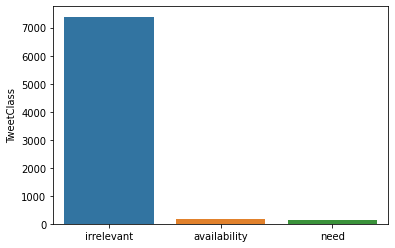

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x = ["irrelevant", 'availability','need'], y = df['TweetClass'].value_counts(), data=df)


In [ ]:
import pandas as pd
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

stop_words = stopwords.words()

def cleaning(text):
    # converting to lowercase, removing URL links, special characters, punctuations...
    text = text.lower()
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('[’“”…]', '', text)

    # removing the emojies
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # removing the stop-words
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word in stop_words]
    filtered_sentence = (" ").join(tokens_without_sw)
    text = filtered_sentence

    return text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
dt = df1['Tweet'].apply(cleaning)

from collections import Counter
p = Counter(" ".join(dt).split()).most_common(50)
rslt = pd.DataFrame(p, columns=['Word', 'Frequency'])
print(rslt)

               Word  Frequency
0        earthquake        103
1              wifi         72
2             italy         47
3             blood         34
4         passwords         33
5               red         29
6             cross         29
7           italian         22
8           disable         22
9            donate         20
10          victims         18
11         italians         17
12         password         16
13        terremoto         13
14           locals         13
15           rescue         12
16  italyearthquake         12
17           remove         12
18            quake         12
19             food         11
20            water         11
21           unlock         10
22          central          9
23            asked          9
24         rescuers          9
25         amatrice          8
26              amp          8
27           needed          8
28      devastating          8
29             asks          8
30            urged          8
31      

In [ ]:
dt = df2['Tweet'].apply(cleaning)

from collections import Counter
p = Counter(" ".join(dt).split()).most_common(50)
rslt = pd.DataFrame(p, columns=['Word', 'Frequency'])
print(rslt)

               Word  Frequency
0        earthquake        122
1             italy        116
2            rescue         32
3              army         31
4             quake         28
5         mobilized         23
6           italian         21
7           victims         21
8              team         21
9        volunteers         19
10          central         18
11         amatrice         18
12        survivors         18
13              aid         18
14             free         15
15  italyearthquake         13
16       shelterbox         12
17       crocerossa         11
18            calls         11
19              red         10
20            cross         10
21             pope         10
22          vatican         10
23               62          9
24           deadly          9
25         rescuers          9
26        emergency          8
27           search          8
28            tents          8
29            rocks          8
30         affected          7
31      

In [ ]:
def wordBarGraphFunction(df,column,title):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    plt.barh(range(50), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:50])])
    plt.yticks([x + 0.5 for x in range(50)], reversed(popular_words_nonstop[0:50]))
    plt.title(title)
    plt.show()

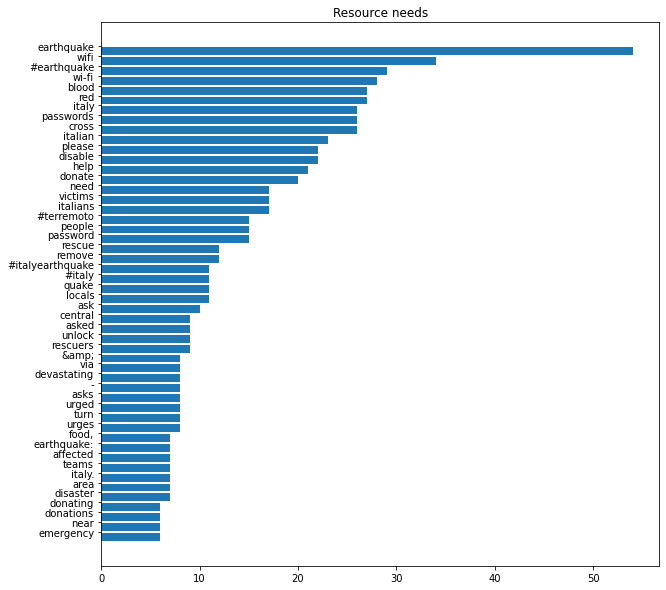

In [ ]:
plt.figure(figsize=(10,10))
wordBarGraphFunction( df1,'Tweet',"Resource needs")

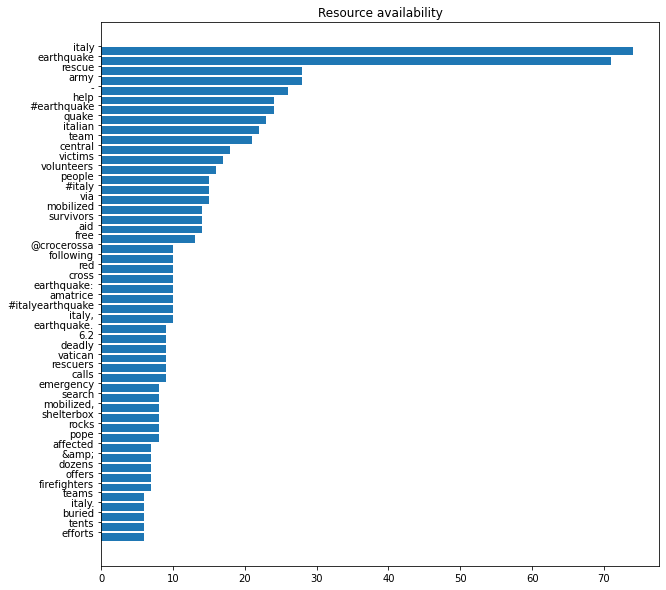

In [ ]:
plt.figure(figsize=(10,10))
wordBarGraphFunction( df2,'Tweet',"Resource availability")

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

need_vect = CountVectorizer(stop_words='english')

available_vect = CountVectorizer(stop_words='english')

need_dtm = need_vect.fit_transform(df1['Tweet'].apply(cleaning))
available_dtm = available_vect.fit_transform(df2['Tweet'].apply(cleaning))

In [ ]:
need_word = need_vect.get_feature_names()
need_freqs = need_dtm.sum(axis=0).A1
need_result = dict(zip(need_word,need_freqs))
print(len(need_word))

455


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


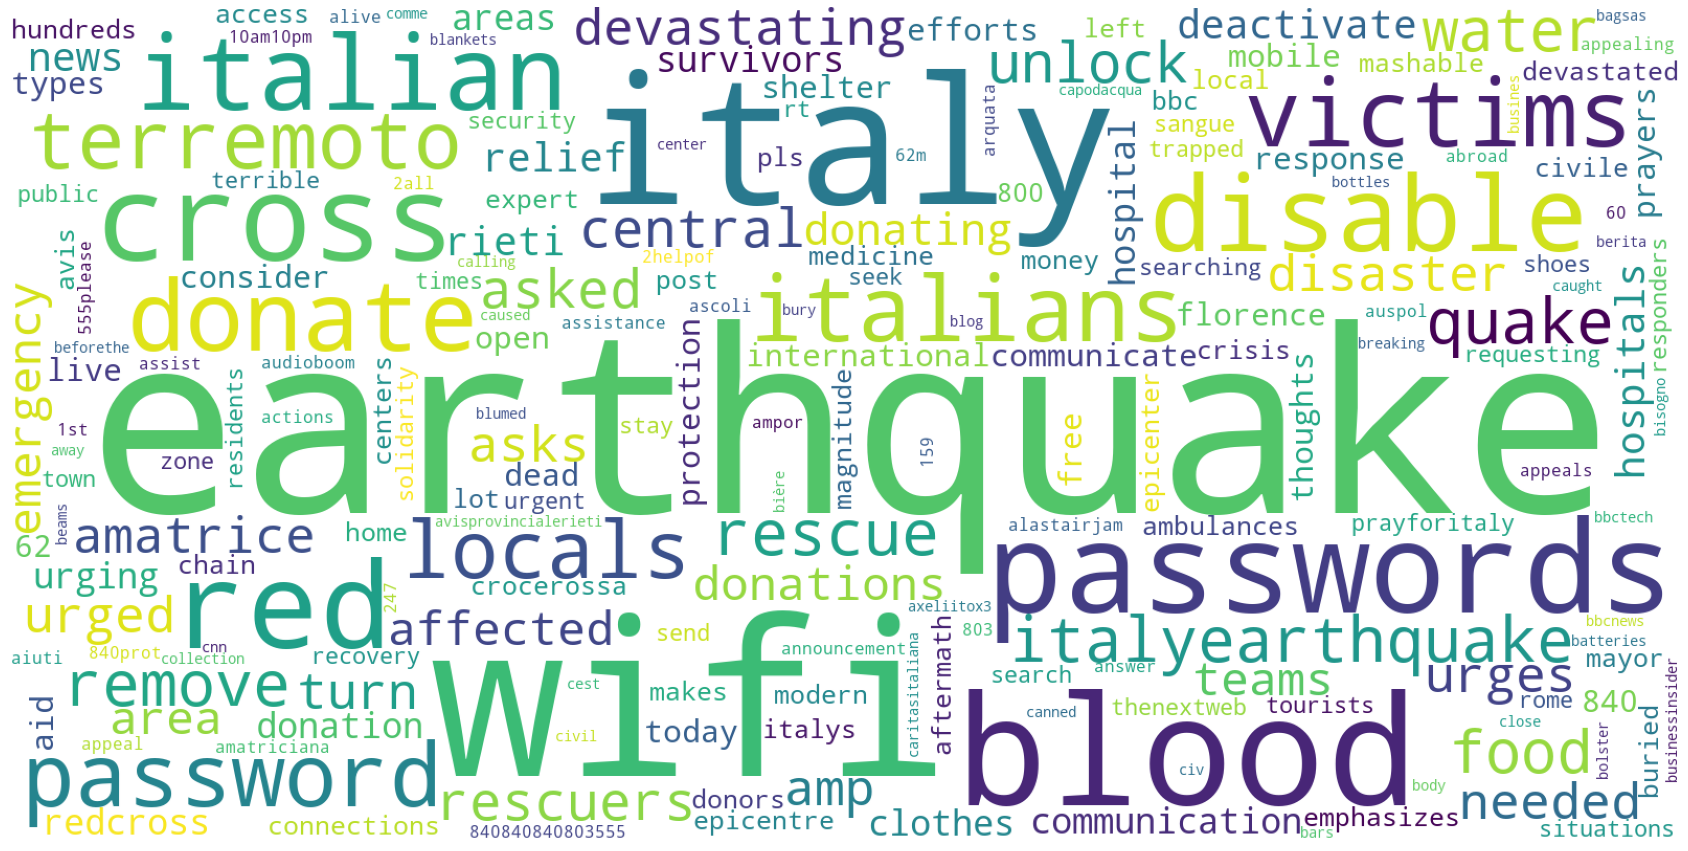

In [ ]:
from wordcloud import WordCloud,STOPWORDS

wordcloud = WordCloud(background_color='white',
                        width=1600,
                        height=800,
                      stopwords=STOPWORDS,
                    ).generate_from_frequencies(need_result)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
fig.savefig("need_word_cloud.png")
plt.show()

In [ ]:
available_word = available_vect.get_feature_names()
available_freqs = available_dtm.sum(axis=0).A1
available_result = dict(zip(available_word,available_freqs))
print(len(available_word))

600


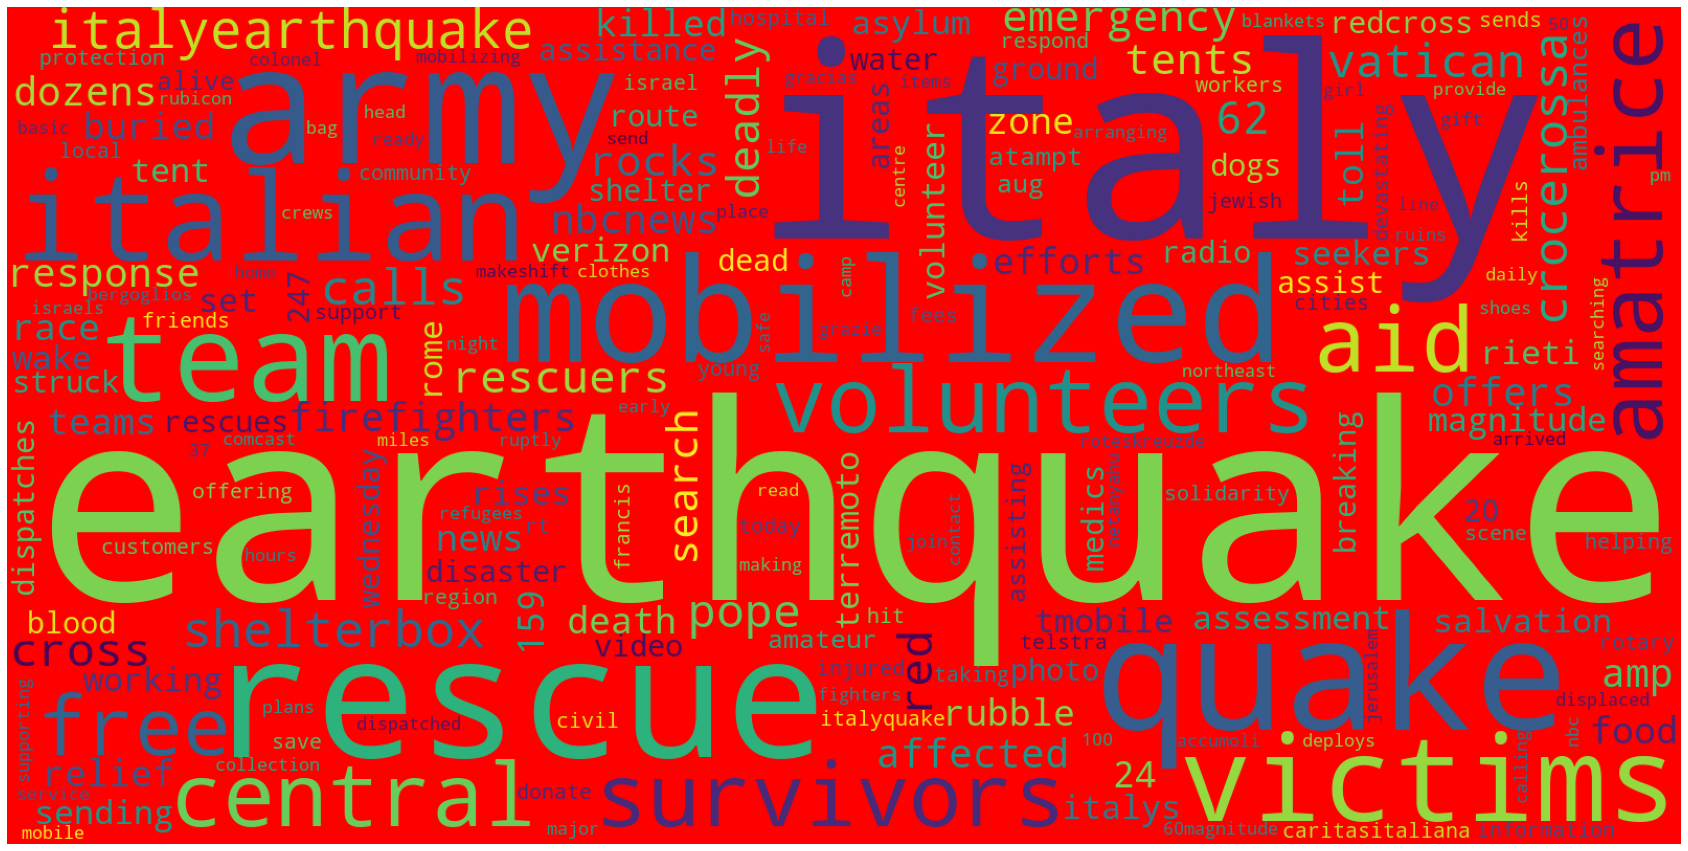

In [ ]:
from wordcloud import WordCloud,STOPWORDS

wordcloud = WordCloud(background_color='red',
                        width=1600,
                        height=800,
                      stopwords=STOPWORDS,
                    ).generate_from_frequencies(available_result)

fig = plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis('off')
fig.savefig("available_word_cloud.png")
plt.show()

**BERT CLASSIFICATION**

In [ ]:
#get unique values
possible_labels = df.TweetClass.unique()
print(possible_labels)

[0 1 2]


In [ ]:
label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index

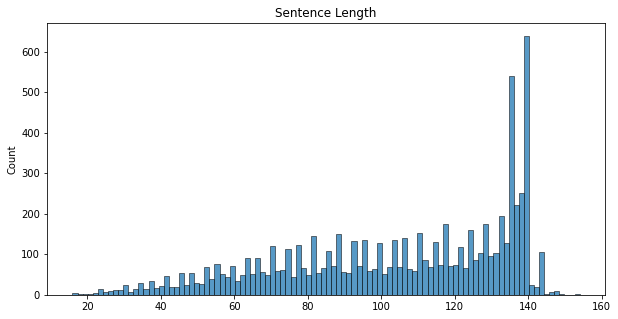

In [ ]:
#need equal length sentences
#plot hist of sentence length
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.histplot([len(s) for s in df.Tweet], bins=100)
plt.title('Sentence Length')
plt.show()

In [ ]:
max_len = max([len(sent) for sent in df.Tweet])
print('Max length: ', max_len)

Max length:  154


In [ ]:
from sklearn.model_selection import train_test_split

#train test split
X_train, X_val, y_train, y_val = train_test_split(df.index.values,
                                                   df.TweetClass.values,
                                                   test_size = 0.15,
                                                   random_state = 17,
                                                   stratify = df.TweetClass.values)

In [ ]:
df['data_type'] = ['not_set'] * df.shape[0]

In [ ]:
df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'

#groupby count
df.groupby(['TweetClass', 'data_type']).count()

Tweet
TweetClass data_type       
0          train       6244
           val         1146
1          train         82
           val           51
2          train        107
           val           61

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 31.6 MB/s 
     |████████████████████████████████| 163 kB 70.7 MB/s 
     |████████████████████████████████| 6.6 MB 56.0 MB/s 


In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',
                                         do_lower_case = True)

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
df.head()

,Tweet,TweetClass,data_type
0,GUYS WTF IS IT AN EARTHQUAKE,0,train
1,Well holy shit that was an earthquake just now...,0,val
2,CONGRATULATIONS! Former pro boxer just joined ...,0,train
3,"Oh my God, earthquake.",0,train
4,"#GEOFON #Earthquake M 4.1, Banda Sea: 2016-08-...",0,val


In [ ]:
#encode train set
encoded_data_train = tokenizer.batch_encode_plus(df[df.data_type == 'train'].Tweet.values,
                                                add_special_tokens = True,
                                                return_attention_mask = True,
                                                pad_to_max_length = True,
                                                max_length = 256,
                                                return_tensors = 'pt')

#encode validation set
encoded_data_val = tokenizer.batch_encode_plus(df[df.data_type == 'val'].Tweet.values,
                                                add_special_tokens = True,
                                                return_attention_mask = True,
                                                pad_to_max_length = True,
                                                max_length = 256,
                                                return_tensors = 'pt')

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2308: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2308: FutureWarning: 

In [ ]:
import numpy as np
np_array = np.array(df[df.data_type == 'train'].TweetClass.values)
np_array = np_array.astype(np.int)


npp_array = np.array(df[df.data_type == 'val'].TweetClass.values)
npp_array = npp_array.astype(np.int)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review yo

In [ ]:
#train set
import torch
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(np_array, dtype=torch.long)



#validation set
input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(npp_array,dtype=torch.long)


In [ ]:
print(labels_train)

tensor([0, 0, 0,  ..., 2, 2, 2])


In [ ]:
from transformers import BertForSequenceClassification

model = BertForSequenceClassification.from_pretrained('bert-base-uncased',
                                                      num_labels = len(label_dict),
                                                      output_attentions = False,
                                                      output_hidden_states = False)

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
from torch.utils.data import TensorDataset

#train set
dataset_train = TensorDataset(input_ids_train,
                              attention_masks_train,
                              labels_train)

#validation set
dataset_val = TensorDataset(input_ids_val,
                             attention_masks_val,
                             labels_val)

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 32

#train set
dataloader_train = DataLoader(dataset_train,
                              sampler = RandomSampler(dataset_train),
                              batch_size = batch_size)

#validation set
dataloader_val = DataLoader(dataset_val,
                              sampler = RandomSampler(dataset_val),
                              batch_size = 32) #since we don't have to do backpropagation for this step

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(),
                 lr = 1e-5,
                 eps = 1e-8) #2e-5 > 5e-5

epochs = 10

scheduler = get_linear_schedule_with_warmup(optimizer,
                                           num_warmup_steps = 0,
                                           num_training_steps = len(dataloader_train)*epochs)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [ ]:
def evaluate(dataloader_val):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    #evaluation mode
    model.eval()

    #tracking variables
    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in tqdm(dataloader_val):

        #load into GPU
        batch = tuple(b.to(device) for b in batch)

        #define inputs
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2]}

        #compute logits
        with torch.no_grad():
            outputs = model(**inputs)

        #compute loss
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        #compute accuracy
        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    #compute average loss
    loss_val_avg = loss_val_total/len(dataloader_val)

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals

In [ ]:
import numpy as np
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis = 1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average = 'weighted')

In [ ]:
#accuracy score
def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}

    #make prediction
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy:{len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [ ]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [ ]:
from tqdm import tqdm

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

for epoch in tqdm(range(1, epochs+1)):
    model.to(device)
    model.train()

    loss_train_total = 0

    progress_bar = tqdm(dataloader_train,
                        desc = 'Epoch {:1d}'.format(epoch),
                        leave = False,
                        disable = False)

    for batch in progress_bar:

        model.zero_grad() #set gradient to 0

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids': batch[0],
                  'attention_mask': batch[1],
                  'labels': batch[2]}

        outputs = model(**inputs) #unpack the dict straight into inputs

        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item() / len(batch))})

    torch.save(model.state_dict(), f'/content/gdrive/MyDrive/BE_Major_Project/Models2/BERT_ft_epoch{epoch}.model')

    tqdm.write('\n Epoch {epoch}')

    loss_train_avg = loss_train_total / len(dataloader_train)
    tqdm.write(f'Training loss: {loss_train_avg}')

    val_loss, predictions, true_vals = evaluate(dataloader_val)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (weighted): {val_f1}')

  0%|          | 0/10 [04:36<?, ?it/s]


 Epoch {epoch}
Training loss: 0.18383963230195097



 10%|█         | 1/10 [04:57<44:34, 297.19s/it]

Validation loss: 0.15424967892467975
F1 Score (weighted): 0.9282675168617311



 10%|█         | 1/10 [09:32<44:34, 297.19s/it]


 Epoch {epoch}
Training loss: 0.04518167898525705



 20%|██        | 2/10 [09:52<39:28, 296.07s/it]

Validation loss: 0.17040365255525103
F1 Score (weighted): 0.9558129485237815



 20%|██        | 2/10 [14:27<39:28, 296.07s/it]


 Epoch {epoch}
Training loss: 0.02759514952834585



 30%|███       | 3/10 [14:47<34:29, 295.70s/it]

Validation loss: 0.0858821815054398
F1 Score (weighted): 0.9807135619717494



 30%|███       | 3/10 [19:22<34:29, 295.70s/it]


 Epoch {epoch}
Training loss: 0.019194338268987688



 40%|████      | 4/10 [19:43<29:33, 295.58s/it]

Validation loss: 0.09554150475523784
F1 Score (weighted): 0.9803945275042573



 40%|████      | 4/10 [24:17<29:33, 295.58s/it]


 Epoch {epoch}
Training loss: 0.016316518038257698



 50%|█████     | 5/10 [24:38<24:37, 295.46s/it]

Validation loss: 0.09289835839008447
F1 Score (weighted): 0.978921011887519



 50%|█████     | 5/10 [29:13<24:37, 295.46s/it]


 Epoch {epoch}
Training loss: 0.013335417081990352



 60%|██████    | 6/10 [29:33<19:41, 295.47s/it]

Validation loss: 0.0893023637625447
F1 Score (weighted): 0.982160159983601



 60%|██████    | 6/10 [34:08<19:41, 295.47s/it]


 Epoch {epoch}
Training loss: 0.0094604200039792



 70%|███████   | 7/10 [34:28<14:46, 295.35s/it]

Validation loss: 0.11421150156311341
F1 Score (weighted): 0.9786301577947114



 70%|███████   | 7/10 [39:04<14:46, 295.35s/it]


 Epoch {epoch}
Training loss: 0.007577525707014195



 80%|████████  | 8/10 [39:24<09:51, 295.53s/it]

Validation loss: 0.12152170154513442
F1 Score (weighted): 0.9793275620289654



 80%|████████  | 8/10 [43:59<09:51, 295.53s/it]


 Epoch {epoch}
Training loss: 0.005945118407529806



 90%|█████████ | 9/10 [44:20<04:55, 295.45s/it]

Validation loss: 0.10697849731877795
F1 Score (weighted): 0.9793980413799812



 90%|█████████ | 9/10 [48:54<04:55, 295.45s/it]


 Epoch {epoch}
Training loss: 0.004715028002951525



100%|██████████| 10/10 [49:15<00:00, 295.53s/it]

Validation loss: 0.14022725880167855
F1 Score (weighted): 0.9776388312325419


In [ ]:

model.load_state_dict(torch.load("/content/gdrive/MyDrive/BE_Major_Project/Models2/BERT_ft_epoch10.model",map_location=torch.device('cpu')))

<All keys matched successfully>

In [ ]:
from tqdm import tqdm
_, predictions, true_vals = evaluate(dataloader_val)

100%|██████████| 40/40 [00:20<00:00,  1.93it/s]


In [ ]:
accuracy_per_class(predictions, true_vals)

Class: 0
Accuracy:1142/1146

Class: 1
Accuracy:37/51

Class: 2
Accuracy:52/61



In [ ]:
 preds_flat = np.argmax(predictions, axis=1).flatten()
 labels_flat = true_vals.flatten()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(labels_flat,preds_flat, target_names = ['0', '1', '2'] , digits = 4))

              precision    recall  f1-score   support

           0     0.9845    0.9965    0.9905      1146
           1     0.8810    0.7255    0.7957        51
           2     0.9286    0.8525    0.8889        61

    accuracy                         0.9785      1258
   macro avg     0.9313    0.8582    0.8917      1258
weighted avg     0.9776    0.9785    0.9776      1258



In [ ]:
 possible_labels = ['0', '1', '2']

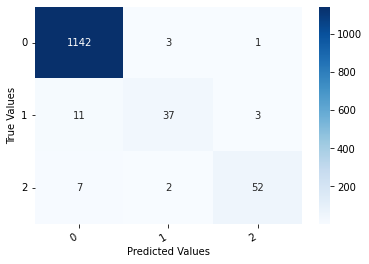

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True Values')
  plt.xlabel('Predicted Values');
cm = confusion_matrix(labels_flat,preds_flat)
df_cm = pd.DataFrame(cm, index= possible_labels, columns= possible_labels)
show_confusion_matrix(df_cm)